# Data Analisys with Python
This notebook will cover what you need to know about data analysis with Python.

The topics that will be covered are:
- Data extraction from a CSV
- Linear regression

## 1. Data extraction
In this section, you'll find the steps on how to extract, filter, organize and read data from a csv

1. Coefficient of Correlation

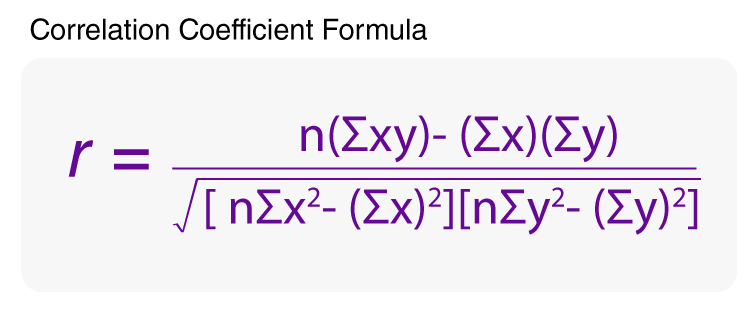

In [ ]:
# set up kaggle for dataset
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download abhishek14398/salary-dataset-simple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.60MB/s]


In [ ]:
# unzip dataset
import zipfile

with zipfile.ZipFile("/content/salary-dataset-simple-linear-regression.zip", "r") as ref:
  ref.extractall("/content/salary-dataset-simple-linear-regression")

In [ ]:
import pandas as pd

# read the dataset as dataframe
salary_df = pd.read_csv("/content/salary-dataset-simple-linear-regression/Salary_dataset.csv")

# check the first 5 rows of the dataset
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
# what about the "unamed" title?
salary_df = pd.read_csv("/content/salary-dataset-simple-linear-regression/Salary_dataset.csv", index_col=0)
salary_df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
# check the info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [ ]:
# check description
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
# are all the values in the df non-null?
salary_df.isnull().sum()

,0
YearsExperience,0
Salary,0


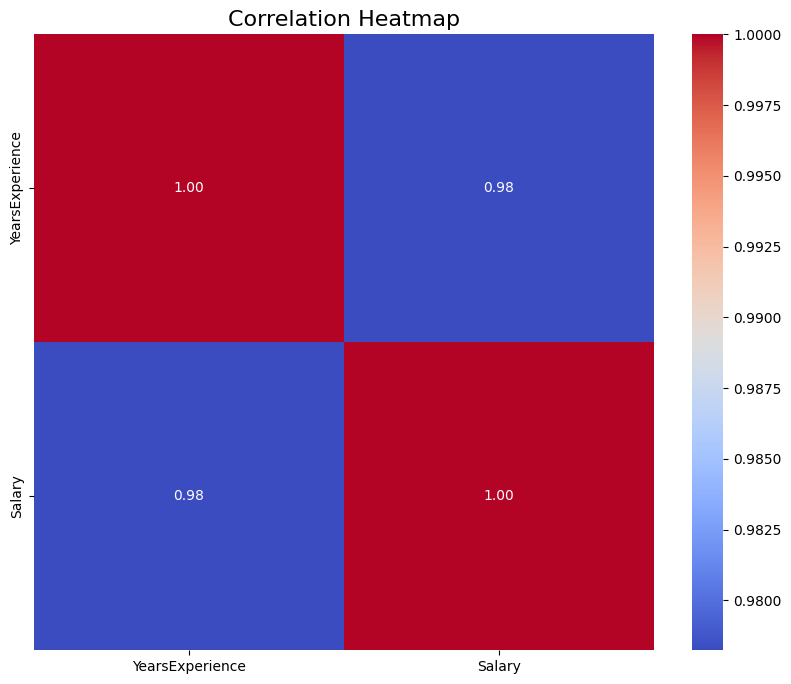

In [ ]:
# check correlation heatmap
import seaborn as sns
corr = salary_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # show numbers inside the squares
    fmt=".2f",         # format numbers to 2 decimals
    cmap="coolwarm",   # color palette (blue = negative, red = positive)
    cbar=True          # show color bar
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<Axes: xlabel='YearsExperience'>

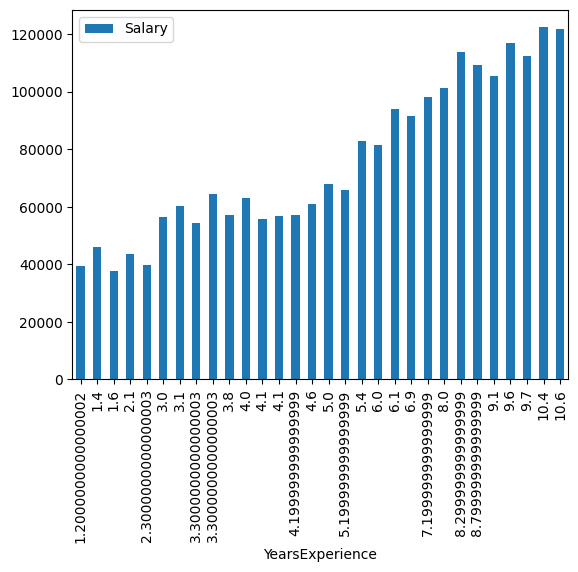

In [ ]:
# check visually the data
salary_df.plot(x="YearsExperience", y="Salary", kind="bar")

<Axes: xlabel='YearsExperience'>

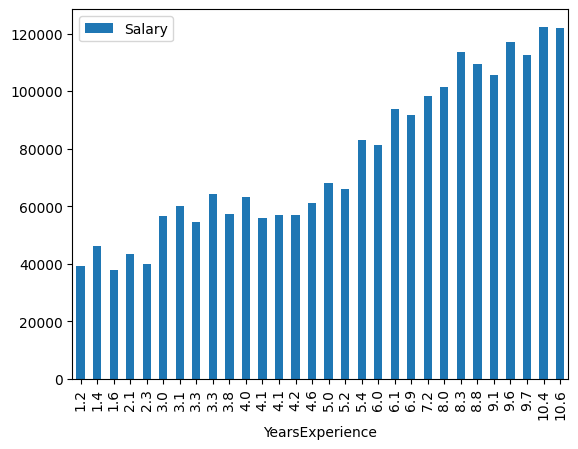

In [ ]:
# get rid of the decimals
salary_df["YearsExperience"] = salary_df["YearsExperience"].round(2)

# check again
salary_df.plot(x="YearsExperience", y="Salary", kind="bar")

In [ ]:
def get_r(x, y):
  """
  can we do Linear Regression? we need the coefficient of correlation (r)
  0 means no relation, -1 or 1 mean 100%
  """
  n = len(salary_df)

  # numerator and denominator
  numerator = (n * sum(x*y)) - ((sum(x))*(sum(y)))
  denominator = ( (n * sum(x**2) - (sum(x)**2)) * (n * (sum(y**2)) - (sum(y)**2)) )**0.5

  # get r
  r = numerator / denominator
  return r

In [ ]:
# get r for our data
print(get_r(salary_df["YearsExperience"], salary_df["Salary"]))

0.97824161848876


In [ ]:
import random
import numpy as np
# try with dummy data
dummy_x = random.sample(range(1, 101), 30)
dummy_y = random.sample(range(101, 201), 30)

print(get_r(np.array(dummy_x), np.array(dummy_y)))

0.011934549320088436


##Linear Regression (Scipy)
In this part of the notebook, we'll talk about linear regression with the parsed and cleaned CSV.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

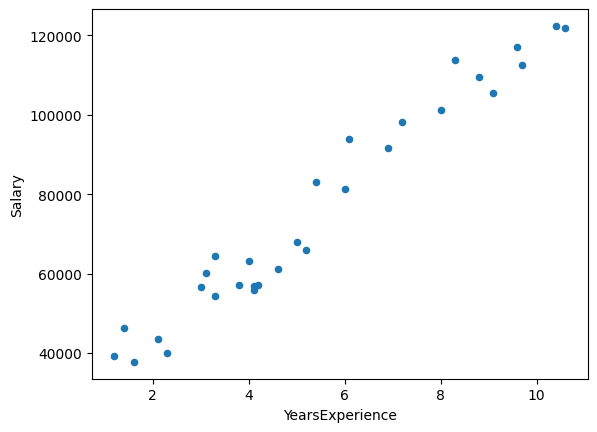

In [ ]:
# the correct way to visualize the data
salary_df.plot(x="YearsExperience", y="Salary", kind="scatter")

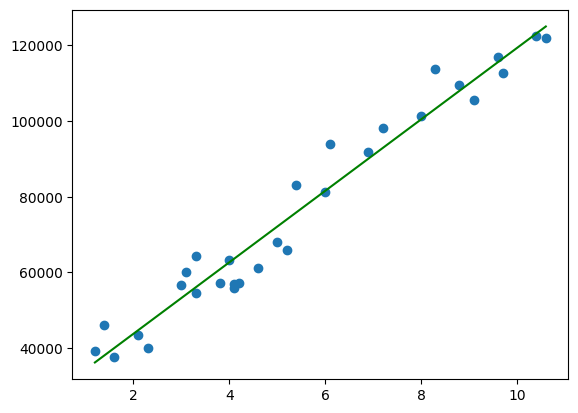

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# set x and y values
x = salary_df["YearsExperience"]
y = salary_df["Salary"]

# draw the linear regression line
slope, intercept, r, p, std_err = stats.linregress(x, y)

def line(x):
  """
  Line equation:
  y = mx + b
  m -> slope
  m = (y2 -y1) / (x2 - x1)
  """
  return slope * x + intercept

# make the model
model = list(map(line, x))

# plot
plt.scatter(x, y)
plt.plot(x, model, color="green")
plt.show()

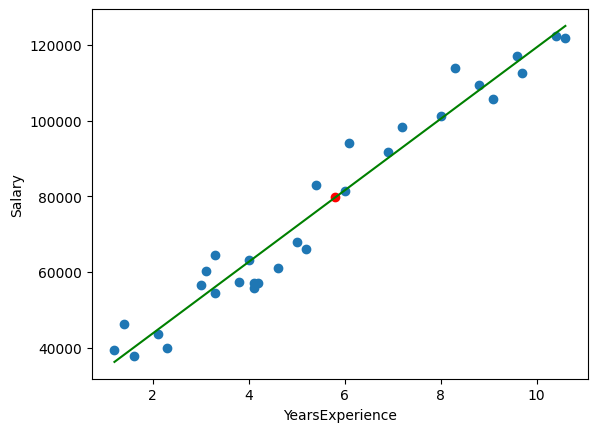

In [ ]:
# predict future values
predict_x = 5.8
predicted = line(predict_x)

# plot normal
plt.scatter(x, y)
plt.plot(x, model, color="green")

# predicted
plt.scatter(predict_x, predicted, color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

# Linear regression (from scratch)
In this part of the notebook, we'll program linear regression from scratch.

In [ ]:
class LinearRegression:

  def __init__(self, learning_rate, convergence_tolerance=1e-6):
    """
    Learning rate: size of the steps in change
    Convergence tolerance: Minimum change in cost between iterations (early stopping)
    """
    self.learning_rate = learning_rate
    self.convergence_tolerance = convergence_tolerance
    self.W = None
    self.b = None

  def init_params(self, n_features):
    """
    Initialize model parameters with the number of features
    """
    # get random weights normalized
    self.W = np.random.randn(n_features) * 0.1
    # set bias
    self.b = 0

  def forward_prop(self, X):
    """
    Forward propagation for linear regression using the equation of the line
    """
    return np.dot(X, self.W) + self.b

  def compute_cost(self, predictions):
    """
    Compute the MSE (mean squared error)
    """
    m = len(predictions)
    cost = np.sum(np.square(predictions - self.y)) / (2 * m)
    return cost

  def back_prop(self, predictions):
    """
    Compute the gradients for model parameters
    """
    m = len(predictions)
    self.dW = np.dot(predictions - self.y, self.X) / m
    self.db = np.sum(predictions - self.y) / m

  def fit(self, X, y, iterations, plot_cost=True):
    """
    Fit the model with the train data
    """
    self.X = X
    self.y = y
    self.init_params(X.shape[1])
    costs = []

    for i in range(iterations):
        predictions = self.forward_prop(X)
        cost = self.compute_cost(predictions)
        self.back_prop(predictions)
        self.W -= self.learning_rate * self.dW
        self.b -= self.learning_rate * self.db
        costs.append(cost)

        if i % 100 == 0:
            print(f'Iteration: {i}, Cost: {cost}')

        if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tolerance:
            print(f'Converged after {i} iterations.')
            break

    if plot_cost:
        plt.plot(range(len(costs)), costs)
        plt.title("Cost vs Iteration")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()

  def predict(self, X):
    """
    Predict new values to the model
    """
    return self.forward_prop(X)

In [ ]:
x = np.array(x)
y = np.array(y)
# Reshape x to 2D
X = x.reshape(-1, 1)
x,y

(array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
         4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
         8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6]),
 array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
         54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
         61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
         98274., 101303., 113813., 109432., 105583., 116970., 112636.,
        122392., 121873.]))

Iteration: 0, Cost: 3251628722.834307
Iteration: 100, Cost: 52325692.20281079
Iteration: 200, Cost: 39950289.36673362
Iteration: 300, Cost: 31749040.041472543
Iteration: 400, Cost: 26314025.81316682
Iteration: 500, Cost: 22712211.200495545
Iteration: 600, Cost: 20325268.322501186
Iteration: 700, Cost: 18743427.80168035
Iteration: 800, Cost: 17695133.158193447
Iteration: 900, Cost: 17000422.379768644
Iteration: 1000, Cost: 16540033.62489123
Iteration: 1100, Cost: 16234931.397892293
Iteration: 1200, Cost: 16032738.429594217
Iteration: 1300, Cost: 15898744.008015241
Iteration: 1400, Cost: 15809945.148364399
Iteration: 1500, Cost: 15751097.64275657
Iteration: 1600, Cost: 15712099.068564482
Iteration: 1700, Cost: 15686254.493279506
Iteration: 1800, Cost: 15669127.147331646
Iteration: 1900, Cost: 15657776.758478949
Iteration: 2000, Cost: 15650254.791707216
Iteration: 2100, Cost: 15645269.941862045
Iteration: 2200, Cost: 15641966.453727502
Iteration: 2300, Cost: 15639777.213490771
Iteration: 

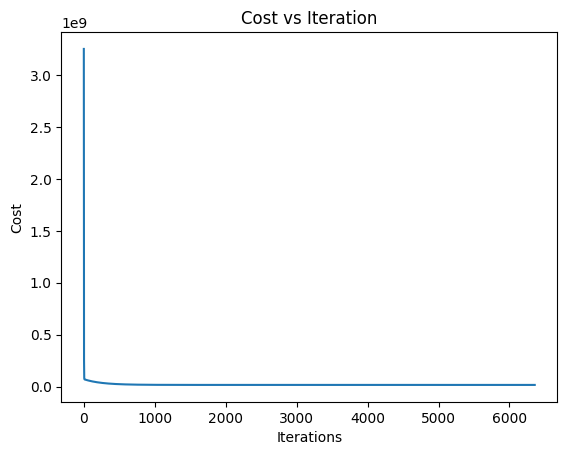

In [ ]:
model_scratch = LinearRegression(0.01)
model_scratch.fit(X, y, 10000)

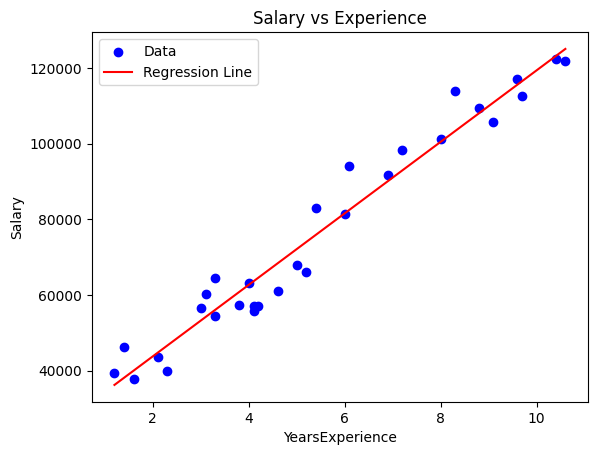

In [ ]:
# Make predictions
preds = model_scratch.predict(X)

# Plot regression line
plt.scatter(x, y, label="Data", color="blue")   # scatter plot of points
plt.plot(x, preds, label="Regression Line", color="red")  # regression line
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.legend()
plt.show()

In [ ]:
# predict to the ammount of years we tried before
predicted_salary = model_scratch.predict(np.array([[6.5]]))
predicted_salary

array([86272.95684461])